## Loading the necessary datasets

In [79]:
import pandas as pd

df = pd.read_csv(r"D:\engineassignment\Engine Condition.csv")

##  Part 1: Exploratory Data Analysis (EDA) & Data Cleaning

In [3]:
## Initial data inspection

In [10]:
df.info() ## to see the types of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [11]:
df.describe() ## Gives the statistical summary of data

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [12]:
## Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [14]:
## Removing extra spaces with "_" and converting column names in lowercase for smooth cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")

In [15]:
df.head(5)

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [16]:
## Checking for missing data 
df.isnull().sum()

engine_rpm          0
lub_oil_pressure    0
fuel_pressure       0
coolant_pressure    0
lub_oil_temp        0
coolant_temp        0
engine_condition    0
dtype: int64

In [17]:
## defining a function to visualise key sensors features

In [18]:
## List of key sensor features to visualize
features = ['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure',
            'lub_oil_temp', 'coolant_temp']   

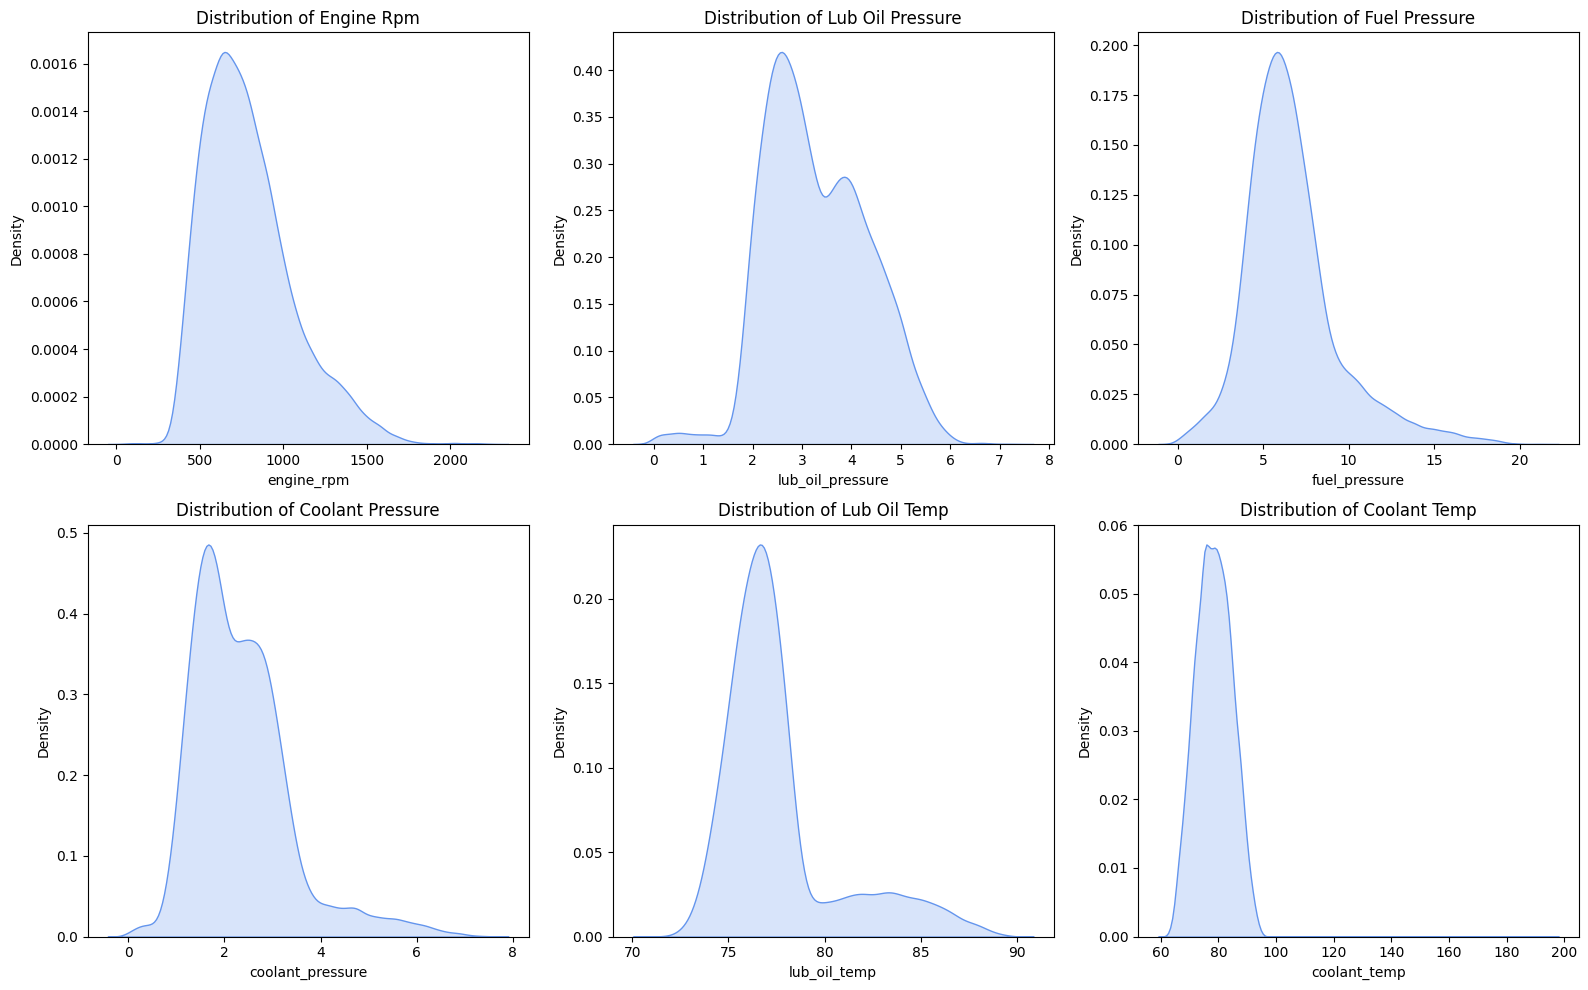

In [19]:
## plot kdes
plt.figure(figsize=(16,10))
for i,col in enumerate(features,1):
    plt.subplot(2,3,i)
    sns.kdeplot(df[col],fill=True,color="cornflowerblue")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
plt.tight_layout()
plt.show()

## Observations in the Plots Above
1. Engine RPM
- skewed right(positive skew)
- Mostly readings are in 400 to 1000 rpm
- Some engines are near 1500 which could be outliers
2. Lub Oil Pressure
- Slightly right skewed
- 2 peaks are present
3. Fuel Pressure
- Also Right skewed and long lobe
- Most engines operate at lower fuel pressure, with some high-pressure outliers.
4. Coolant Pressure
- Slight right skew, with a distinct mode around 2.
- Potential Outliers
5. Lub Oil Temperature
- Right-skewed, tight clustering around 75–80°C.
- Above 85 may indicate overheating conditions.
6. Coolant Temperature
- Too much right-skewed with a sharp peak and long tail.
- Most readings between 65–85°C

In [20]:
## Now we will check for correlation features

In [21]:
df.corr(numeric_only=True)

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
engine_rpm,1.000000,0.025046,-0.001571,-0.024979,0.052134,0.029560,-0.268201
lub_oil_pressure,0.025046,1.000000,0.043790,-0.009357,-0.008031,-0.060906,0.060904
fuel_pressure,-0.001571,0.043790,1.000000,0.033264,-0.025338,-0.042986,0.116259
coolant_pressure,-0.024979,-0.009357,0.033264,1.000000,-0.020761,0.033451,-0.024054
lub_oil_temp,0.052134,-0.008031,-0.025338,-0.020761,1.000000,0.072914,-0.093635
coolant_temp,0.029560,-0.060906,-0.042986,0.033451,0.072914,1.000000,-0.046326
engine_condition,-0.268201,0.060904,0.116259,-0.024054,-0.093635,-0.046326,1.000000


In [22]:
corr_matrix = df.corr(numeric_only=True)

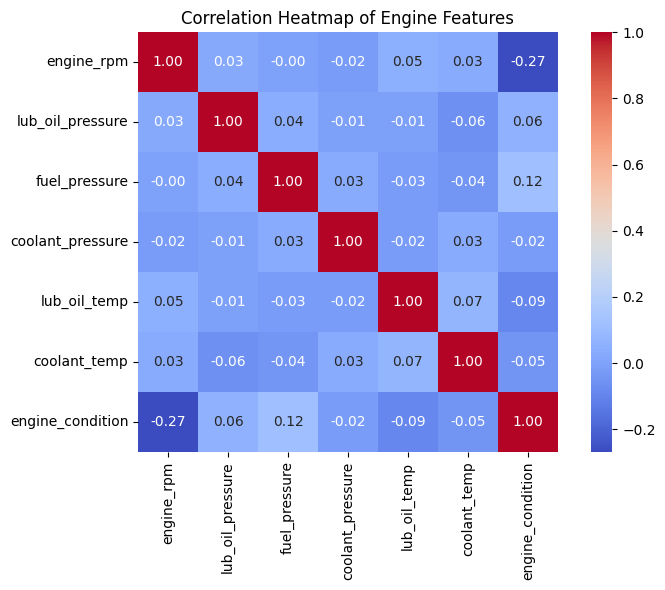

In [23]:
## Correlation HeatMap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",square=True)
plt.title("Correlation Heatmap of Engine Features", fontsize=12)
plt.tight_layout()
plt.show()

## From above Heatmap we can clearly extract the insight that no Multicollinarity is present.
- All absolute correlations are well below 0.8, the typical threshold for multicollinearity.
- So no need to drop any columns 

In [24]:
df.head(5)

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [25]:
## Box Plot For Outliers Detection


In [26]:
## Definig sensor features in a list
sensors_cols =  ['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure', 'lub_oil_temp', 'coolant_temp'] 

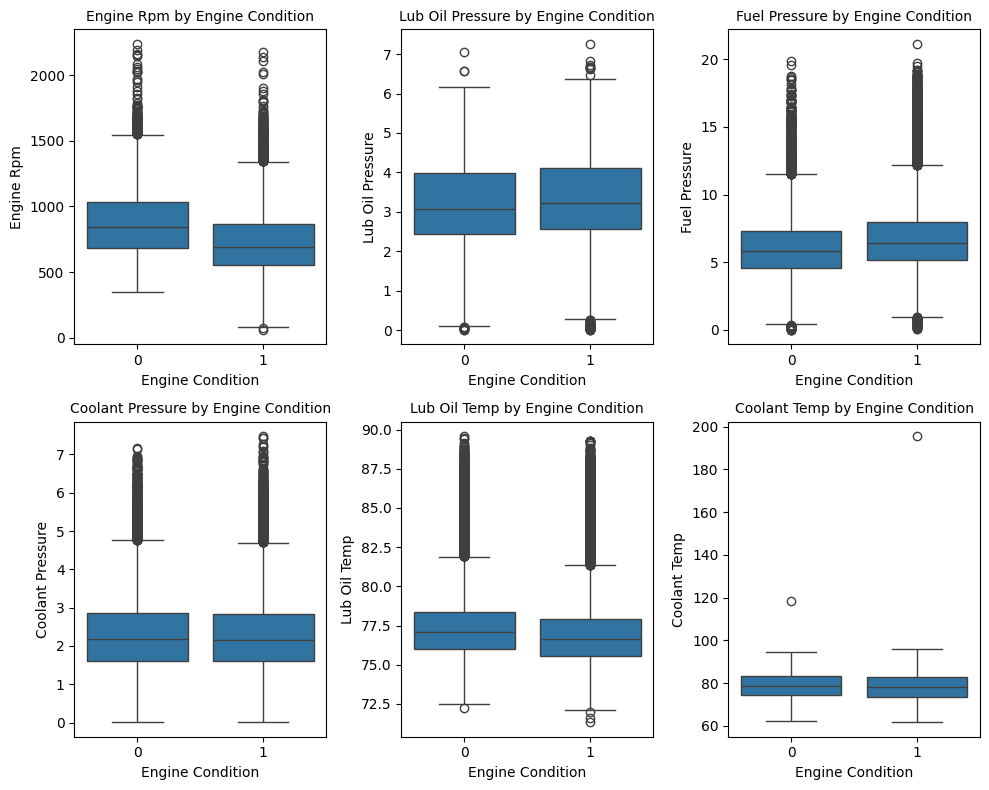

In [27]:
## Creating Box Plots
plt.figure(figsize=(10,8))
for i,col in enumerate(sensors_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x='engine_condition',y=col,data=df)
    plt.title(f'{col.replace("_", " ").title()} by Engine Condition',fontsize=10)
    plt.xlabel("Engine Condition", fontsize=10)
    plt.ylabel(col.replace("_", " ").title(), fontsize=10)
plt.tight_layout()
plt.show()


## Observations
1. Engine rpm
- Failed engine that is engine condition 1 operates at low rpm 
- So low rpm could be sign of negative performance
- For working engines we can see extremely high rpm values
2. Lub oil
- Distributions are similar across both engine states.
- Can't be a strong predictor of failure.
- However outliers exist in both conditions.
3. Fuel Pressure
-  Strong presence of outliers above 20 so potential noise.
- For engine_condition = 0 the median line is higher up the box.
- For engine_condition = 1 the median line is slightly lower.
4. Coolant Pressure
- Similar distribution 
- feature seems less important but moderate outliers are present.
5. Lub Oil Temp
- Looks like little higher oil temperature in failed engines.
6. Cool Temp
- Few extreme outliers exist (~120°C and ~200°C).
- Could harm the model.


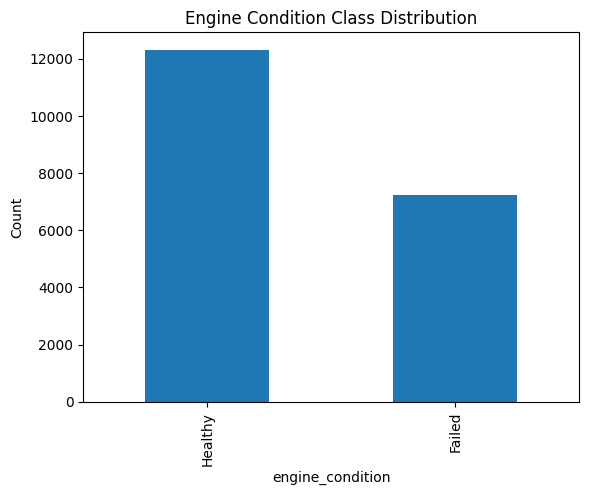

In [28]:
## Bar Plot for class balance to check how imbalance is the dataset
df['engine_condition'].value_counts().plot(kind='bar')
plt.title("Engine Condition Class Distribution")
plt.xticks(ticks=[0, 1], labels=["Healthy", "Failed"])
plt.ylabel("Count")
plt.show()

Insights from the Bar Plot:
1. Healthy engines (0) ~12,300
2. Failed engines (1) ~7,300 

Data set is imbalance but not that skewed we can say around 63% healthy and 37% failed

## Data Quality And Cleaning

In [29]:
## Check for missing values
df.isnull()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
19530,False,False,False,False,False,False,False
19531,False,False,False,False,False,False,False
19532,False,False,False,False,False,False,False
19533,False,False,False,False,False,False,False


In [30]:
df.isnull().sum() ## total missing data column wise

engine_rpm          0
lub_oil_pressure    0
fuel_pressure       0
coolant_pressure    0
lub_oil_temp        0
coolant_temp        0
engine_condition    0
dtype: int64

From above we can say that there are no missing values so nothing to impute

In [31]:
## Outlier Treatment 
## We will use capping for preventing outliers and it also prevents data loss
## Formula:
# Q1 (25th percentile) and Q3 (75th percentile) of each feature are calculated
# The IQR = Q3 - Q1.
# Any value below Q1 - 1.5×IQR or above Q3 + 1.5×IQR is considered an outlier.

 

In [32]:
## Capping function for outliers
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df


In [33]:
## Slewness before capping
out_cols =  ['engine_rpm', 'fuel_pressure', 'coolant_temp', 'lub_oil_temp']
df[out_cols].skew().sort_values(ascending=False)


lub_oil_temp     1.496375
fuel_pressure    1.216387
engine_rpm       0.934932
coolant_temp     0.404451
dtype: float64

In [34]:
## Columns with possible outliers as we seen earlier to cap
out_cols =  ['engine_rpm', 'fuel_pressure', 'coolant_temp', 'lub_oil_temp']


for col in out_cols:
    df = cap_outliers(df, col)


In [35]:
## Now Check for skewness
df[out_cols].skew().sort_values(ascending=False)


lub_oil_temp     0.714774
engine_rpm       0.714177
fuel_pressure    0.535047
coolant_temp     0.053991
dtype: float64

Clearly from above results we can say that some features like Lub oil, Engine rpm etc are still right skewed but we see significant change in coolant temp after clipping the outliers

In [36]:
## Log Transformation for handling skewness
df.head(5)

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,700.0,2.493592,11.790927,3.178981,81.590241,81.632187,1
1,876.0,2.941606,11.987104,2.464504,77.640934,82.445724,0
2,520.0,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473.0,3.707835,11.987104,3.727455,74.129907,71.774629,1
4,619.0,5.672919,11.987104,2.052251,78.396989,87.000225,0


In [37]:
## Applying Log or Box-Cox Transformation according to the data 
# Use log if data has large skew or high value range.
# Use Box-Cox if data is already scaled or moderately skewed.

In [38]:
## Importing required libraries
from scipy.stats import boxcox
import numpy as np


In [39]:
df_transformed = df.copy()  # to preserve original incase for comparing the data

In [40]:
# Apply log where appropriate (if distribution is highly skewed and values > 0)
df_transformed['engine_rpm_log'] = np.log(df_transformed['engine_rpm'])


In [41]:
# Apply Box-Cox where moderately skewed
df_transformed['lub_oil_temp_boxcox'], _ = boxcox(df_transformed['lub_oil_temp'])
df_transformed['fuel_pressure_boxcox'], _ = boxcox(df_transformed['fuel_pressure'])

In [42]:
df_transformed['lub_oil_temp_boxcox']

0        0.096909
1        0.096909
2        0.096909
3        0.096909
4        0.096909
           ...   
19530    0.096909
19531    0.096909
19532    0.096909
19533    0.096909
19534    0.096909
Name: lub_oil_temp_boxcox, Length: 19535, dtype: float64

In [43]:
df_transformed.head(5)

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition,engine_rpm_log,lub_oil_temp_boxcox,fuel_pressure_boxcox
0,700.0,2.493592,11.790927,3.178981,81.590241,81.632187,1,6.551080,0.096909,5.737102
1,876.0,2.941606,11.987104,2.464504,77.640934,82.445724,0,6.775366,0.096909,5.811639
2,520.0,2.961746,6.553147,1.064347,77.752266,79.645777,1,6.253829,0.096909,3.517763
3,473.0,3.707835,11.987104,3.727455,74.129907,71.774629,1,6.159095,0.096909,5.811639
4,619.0,5.672919,11.987104,2.052251,78.396989,87.000225,0,6.428105,0.096909,5.811639


## Part 2: Feature Engineering

## Let's choose combinations that make physical or engineering sense.
## Example temp_pressure_ratio,rpm_fuel_ratio,cooling_efficiency etc

In [44]:
## Creating Features
df_transformed['temp_pressure_ratio'] = df['lub_oil_temp'] / df['lub_oil_pressure']
df_transformed['rpm_fuel_ratio'] = df['engine_rpm'] / df['fuel_pressure']
df_transformed['cooling_efficiency'] = df['coolant_temp'] / df['coolant_pressure']


In [45]:
df_transformed.head(5)

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition,engine_rpm_log,lub_oil_temp_boxcox,fuel_pressure_boxcox,temp_pressure_ratio,rpm_fuel_ratio,cooling_efficiency
0,700.0,2.493592,11.790927,3.178981,81.590241,81.632187,1,6.551080,0.096909,5.737102,32.719967,59.367680,25.678729
1,876.0,2.941606,11.987104,2.464504,77.640934,82.445724,0,6.775366,0.096909,5.811639,26.394064,73.078534,33.453277
2,520.0,2.961746,6.553147,1.064347,77.752266,79.645777,1,6.253829,0.096909,3.517763,26.252176,79.351189,74.830665
3,473.0,3.707835,11.987104,3.727455,74.129907,71.774629,1,6.159095,0.096909,5.811639,19.992775,39.459071,19.255664
4,619.0,5.672919,11.987104,2.052251,78.396989,87.000225,0,6.428105,0.096909,5.811639,13.819516,51.638827,42.392576


In [46]:
## Adding some more features 
df_transformed['pressure_ratio'] = df['lub_oil_pressure'] / df['fuel_pressure']
df_transformed['rpm_temp_ratio'] = df['engine_rpm'] / df['lub_oil_temp']
df_transformed['temp_difference'] = df['lub_oil_temp'] - df['coolant_temp']
df_transformed['pressure_difference'] = df['lub_oil_pressure'] - df['coolant_pressure']


In [47]:
## z score features (anamoly flags)
from scipy.stats import zscore
df_transformed['z_rpm'] = zscore(df['engine_rpm'])

In [48]:
df_transformed.head(5)


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition,engine_rpm_log,lub_oil_temp_boxcox,fuel_pressure_boxcox,temp_pressure_ratio,rpm_fuel_ratio,cooling_efficiency,pressure_ratio,rpm_temp_ratio,temp_difference,pressure_difference,z_rpm
0,700.0,2.493592,11.790927,3.178981,81.590241,81.632187,1,6.551080,0.096909,5.737102,32.719967,59.367680,25.678729,0.211484,8.579457,-0.041945,-0.685389,-0.341368
1,876.0,2.941606,11.987104,2.464504,77.640934,82.445724,0,6.775366,0.096909,5.811639,26.394064,73.078534,33.453277,0.245398,11.282708,-4.804790,0.477102,0.341374
2,520.0,2.961746,6.553147,1.064347,77.752266,79.645777,1,6.253829,0.096909,3.517763,26.252176,79.351189,74.830665,0.451958,6.687908,-1.893511,1.897399,-1.039626
3,473.0,3.707835,11.987104,3.727455,74.129907,71.774629,1,6.159095,0.096909,5.811639,19.992775,39.459071,19.255664,0.309319,6.380691,2.355278,-0.019621,-1.221949
4,619.0,5.672919,11.987104,2.052251,78.396989,87.000225,0,6.428105,0.096909,5.811639,13.819516,51.638827,42.392576,0.473252,7.895711,-8.603237,3.620667,-0.655584


In [49]:
## Dropping the original features 
df_transformed.drop(['lub_oil_temp', 'fuel_pressure'], axis=1, inplace=True)

In [50]:
df_transformed.head(5)

,engine_rpm,lub_oil_pressure,coolant_pressure,coolant_temp,engine_condition,engine_rpm_log,lub_oil_temp_boxcox,fuel_pressure_boxcox,temp_pressure_ratio,rpm_fuel_ratio,cooling_efficiency,pressure_ratio,rpm_temp_ratio,temp_difference,pressure_difference,z_rpm
0,700.0,2.493592,3.178981,81.632187,1,6.551080,0.096909,5.737102,32.719967,59.367680,25.678729,0.211484,8.579457,-0.041945,-0.685389,-0.341368
1,876.0,2.941606,2.464504,82.445724,0,6.775366,0.096909,5.811639,26.394064,73.078534,33.453277,0.245398,11.282708,-4.804790,0.477102,0.341374
2,520.0,2.961746,1.064347,79.645777,1,6.253829,0.096909,3.517763,26.252176,79.351189,74.830665,0.451958,6.687908,-1.893511,1.897399,-1.039626
3,473.0,3.707835,3.727455,71.774629,1,6.159095,0.096909,5.811639,19.992775,39.459071,19.255664,0.309319,6.380691,2.355278,-0.019621,-1.221949
4,619.0,5.672919,2.052251,87.000225,0,6.428105,0.096909,5.811639,13.819516,51.638827,42.392576,0.473252,7.895711,-8.603237,3.620667,-0.655584


In [51]:
## Feature scaling

In [52]:
## Features to scale
features_to_scale = [
    'engine_rpm',
    'engine_rpm_log',
    'fuel_pressure_boxcox',
    'lub_oil_temp_boxcox',
    'coolant_temp',
    'coolant_pressure',
    'temp_pressure_ratio',
    'rpm_fuel_ratio',
    'cooling_efficiency',
    'pressure_ratio',
    'rpm_temp_ratio',
    'temp_difference',
    'pressure_difference'
]


In [53]:
## Applying standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

This ensures all features are centered (mean = 0) and scaled (std = 1)

In [54]:
df_scaled = df_transformed.copy() ## keeping original copy
df_scaled[features_to_scale] = scaler.fit_transform(df_transformed[features_to_scale])

In [55]:
df_scaled.head(5)

,engine_rpm,lub_oil_pressure,coolant_pressure,coolant_temp,engine_condition,engine_rpm_log,lub_oil_temp_boxcox,fuel_pressure_boxcox,temp_pressure_ratio,rpm_fuel_ratio,cooling_efficiency,pressure_ratio,rpm_temp_ratio,temp_difference,pressure_difference,z_rpm
0,-0.341368,2.493592,0.814018,0.522459,1,-0.204234,-1.387779e-17,1.987986,0.000902,-0.731585,-0.061862,-0.846805,-0.486633,0.174636,-1.131160,-0.341368
1,0.341374,2.941606,0.124605,0.654831,0,0.487589,-1.387779e-17,2.051968,-0.025419,-0.615397,-0.038552,-0.773890,0.324391,-0.571865,-0.336041,0.341374
2,-1.039626,2.961746,-1.226434,0.199247,1,-1.121123,-1.387779e-17,0.082900,-0.026010,-0.562242,0.085512,-0.329778,-1.054133,-0.115568,0.635411,-1.039626
3,-1.221949,3.707835,1.343252,-1.081481,1,-1.413334,-1.387779e-17,2.051968,-0.052054,-0.900293,-0.081121,-0.636457,-1.146304,0.550363,-0.675789,-1.221949
4,-0.655584,5.672919,-0.273186,1.395902,0,-0.583557,-1.387779e-17,2.051968,-0.077740,-0.797080,-0.011749,-0.283995,-0.691770,-1.167212,1.814088,-0.655584


Justification for feature scaling:

Feature scaling is important because many machine learning algorithms depends on the magnitude and distribution
of the input features.
In this case if we plan to use algorithms such as Logistic Regression,SVM or K-Nearest Neighbors (KNN), all of which are sensitive to the scale of data.
So these are the some reasons we might use scaling which helps to improve  performance and reliability of our machine learning model.



## Part 3: Problem Statement Formulation


"Can we predict with at least 85% accuracy whether an engine is likely to fail based on its current sensor readings such as temperature, pressure, and RPM?"

ANSWER:

Clearly by looking at the given data set we say that this is a Binary Classification problem where target is engine_condition:
- 1 indicates a failed engine
- 0 indicates a healthy engine

The model which we are going to build will learn patterns from the given features like sensors and all
and classify new engine records into either failed or passed categories with a target accuracy of 85% or higher.


Justification:
Chosen problem m is relevant from a business perspective because:
- We can detect the issue early and align the maintenance team to fix the issue before it completely fails.
- It reduces costs by avoiding sudden issues which can slow down operations and cause delay in work.
- We can also improve operational efficiency.
- Safety would also be improved.

Additionally, the dataset provides multiple continuous numerical features related to engine health, including:
- engine_rpm
- lub_oil_pressure
- fuel_pressure
- coolant_pressure
- lub_oil_temp
- coolant_temp
These feature tells us the real time engine performance and good for training machine learning model to identify patterns and deviations.

## Part 4: Model Building & Evaluation

In [56]:
## Training and Testing
## Defining features and target
X = df_scaled.drop('engine_condition',axis=1) #scaled features only 
y = df_scaled['engine_condition']

In [57]:
## Train test split
from sklearn.model_selection import train_test_split

 ## Using stratified sampling to maintain class balance and maintaining the data proportion
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42) 

In [58]:
## Model training using logistic regression 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [59]:
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
## Predicting on test data
y_pred = log_reg.predict(X_test)

In [61]:
## Evaluation metrics for classification problems like:
# Accuracy,Precision,recall,F1 score,Confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6636805733299207
Precision: 0.6906737470959177
Recall: 0.8449045879009338
F1 Score: 0.7600438276113952
Confusion Matrix:
 [[ 512  932]
 [ 382 2081]]


In [63]:
## Now using Randomforest classifier
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(random_state=42)

In [64]:
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
y_pred = rf.predict(X_test)

In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6506270796007166
Precision: 0.6929023190442727
Recall: 0.8006496142915144
F1 Score: 0.742889433038237
Confusion Matrix:
 [[ 570  874]
 [ 491 1972]]


In [67]:
## Using Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
 

In [68]:
## Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

In [69]:
## Train the model
gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [70]:
# Predict on test set
y_pred = gb_model.predict(X_test)

In [71]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6713590990529819
Precision: 0.6961730449251248
Recall: 0.8493706861550954
F1 Score: 0.7651792245793709

Confusion Matrix:
 [[ 531  913]
 [ 371 2092]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.37      0.45      1444
           1       0.70      0.85      0.77      2463

    accuracy                           0.67      3907
   macro avg       0.64      0.61      0.61      3907
weighted avg       0.66      0.67      0.65      3907



So from above model training GradientBosst Classifier is working slightly better compare to other models and baseline models.

1. Accuracy: 66.6%
- Its the proportion of total prediction that the model got correct.
- Formula:
   Accuracy= (TP + TN + FP + FN/TP + TN)
- So if accuracy is 66.6% then it means the model correctly predicted failure or no failure in 66 out of 100 engines.

2. Precision:69.1%
- It says that of all engines the model predicted as failed, how many actually failed.
- Formula:
   Precision= (TP+FP/TP)

3. Recall: 85.1%
- It says that of all engines the model predicted as failed,how many the model correctly identified.
- Formula:
   Precision= (TP/TP+FN)
- High recall ensures that we catch most of the failing engines which is the key part here.

4. F1 Score: 76.3%
- Its Harmonic mean of precision and recall
- Formula:
    F1 score = 2*(precision*recall)/(precision+recall)
     
​- Its is a balanced measure.

5. Confusion Matrix:
- Its basically a table showing the count of 
1. True Positives (TP): Actual failures correctly predicted
2. False Positives (FP): Predicted failure but actually healthy
3. False Negatives (FN): Predicted healthy but actually failed
4. True Negatives (TN): Actual healthy correctly predicted







​


In [72]:
## Now sicnce we choose gradient boost little more optimization is needed
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [73]:
# Initialize and train
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [74]:
# Predictions
y_pred = gb_model.predict(X_test)

In [75]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.36      0.44      1444
           1       0.69      0.84      0.76      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.64      0.66      0.64      3907

Confusion Matrix:
 [[ 524  920]
 [ 402 2061]]


Business Use Case Fit:

Good for preventive maintenance: catching more failures early since it is detecting failed engine with 85% recall.

In [76]:
#saving it using joblib 
import joblib

# Save the model
joblib.dump(gb_model, 'engine_failure_model.pkl')

['engine_failure_model.pkl']

In [77]:
## also saving scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']